In [4]:
import numpy as np
import matplotlib.pyplot as plt
import dataGen as dg
from jupyterthemes import jtplot
jtplot.style("onedork")

# More on the corrected coordinate transformation
## Distortion factor
From the last notebook, we had that the actual coordinate transformation that gets implemented is:
\begin{split}
u(r,\theta) &= -a\ln\frac{r}{b} + \frac{lf}{kr}\sin\theta
\\
v(r,\theta) &= a\theta -\frac{lf}{kr}\cos\theta
\end{split}
This leaves us with this factor $\frac{lf}{kr}=\frac{l\lambda f}{2\pi r}$ that modulates the amplitude of the sinusoidal distortions (in the $u$-$v$ plane). From this we can see immediately that to reduce the distortions, we can either decrease the wavelength, decrease the focal length (of the first lens), or increase the waist of the beam. However, there is an inherent flaw with this. The spatial position in the final plane is given by:
$$t_l = \frac{l \lambda f}{2\pi a}$$
So decreasing the distortions in the $u$-$v$ plane (and thus decreasing the distortion in the output plane) also decreases the spatial separation between modes in the output plane. The extra factor of $a$ in this spatial position does not help because decreasing $a$ still increases the effect of the distortion on the coordinate transformation relative to the desired transformation. 

This information is still useful, however. It means that the purity of the sorting (and equivalently, the range of $l$ that can be sorted), is determined by the quantity $\frac{\lambda f}{w_0}$ where $w_0$ is the beam waist. 

2666


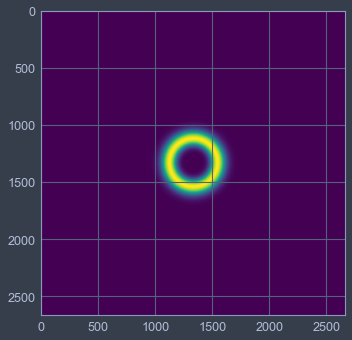

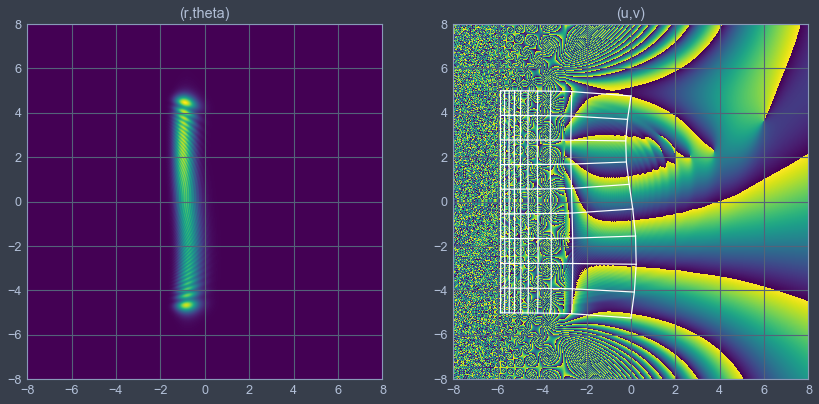

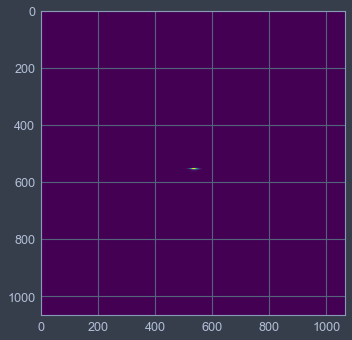

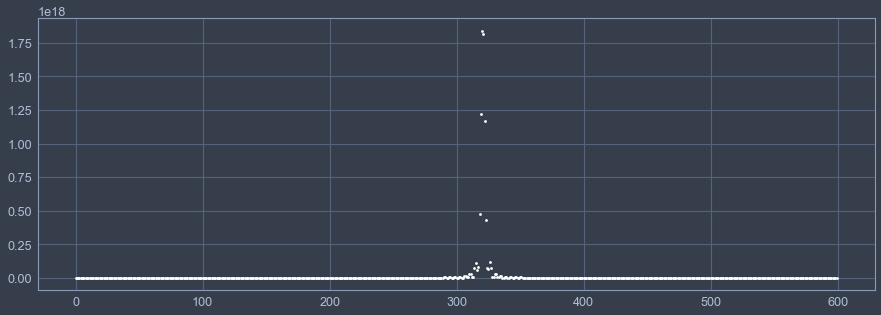

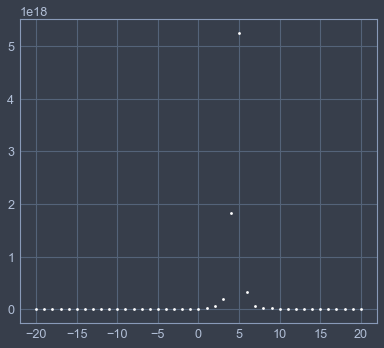

In [22]:
a = 10/(2*np.pi); b = 1
k = 2*np.pi; f = .3; lam = 2*np.pi/k
l = -5
hw = lam*f/(2*2*np.pi*a) # = 2*dt

hwpix = 2
res = int(hwpix*2*10/hw) # hwpixels = res/(2*15)*hw
print(res)

x = np.linspace(-10,10,res); y = x
X,Y = np.meshgrid(x,y)
dx = x[1]-x[0]; dy = y[1]-y[0]
xres = len(x); yres = len(y)

u = lam*f*np.linspace(-1/(2*dx),(xres-2)/(2*dx*xres),xres)
v = lam*f*np.linspace(-1/(2*dy),(yres-2)/(2*dy*yres),yres)
umesh,vmesh = np.meshgrid(u,v)

phi1 = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
phi2 = -a*k*b/f*np.exp(-umesh/a)*np.cos(vmesh/a)

LG = dg.LG(X,Y,l,w_0=1)
psi_u = LG*np.exp(1j*phi1)
psi_L1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psi_u)))
psi_c = psi_L1*np.exp(1j*phi2)
psi_f = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psi_c)))

r = np.linspace(1,40,10); t = np.linspace(-np.pi,np.pi,10)
rmesh,tmesh = np.meshgrid(r,t)

U = -a*np.log(rmesh/b)+l*f/k*np.sin(tmesh)/rmesh
V = a*tmesh - l*f/k*np.cos(tmesh)/rmesh

extent = [-lam*f/(5*dx),lam*f/(5*dx),-lam*f/(5*dx),lam*f/(5*dx)]

#print(np.abs(1000-np.argmax(LG[1000])))

plt.imshow(np.abs(LG)**2); plt.show()

plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)")
#for i in range(len(U)):
#    plt.plot(U[i],V[i],'w')
#    plt.plot(U[:,i],V[:,i],'w')
plt.imshow(np.abs(psi_L1[int(.3*res):int(.7*res),int(.3*res):int(.7*res)])**2,extent=extent,origin='lower')
plt.subplot(1,2,2); plt.title("(u,v)")
for i in range(len(U)):
    plt.plot(U[i],V[i],'w')
    plt.plot(U[:,i],V[:,i],'w')
plt.imshow(np.angle(psi_c[int(.3*res):int(.7*res),int(.3*res):int(.7*res)]),extent=extent,origin='lower')
plt.show()
plt.imshow(np.abs(psi_f[int(.3*res):int(.7*res),int(.3*res):int(.7*res)])**2); plt.show()

data = np.abs(psi_f)**2
data = np.sum(data,axis=1)

plt.figure(figsize=(15,5)); plt.plot(data[int(res/2)-300:int(res/2)+300],'w.'); plt.show()

def bin(dat):
    out = [np.sum(dat[int(res/2)-hwpix:int(res/2)+hwpix])]
    for i in range(1,21):
        out = [np.sum(dat[int(res/2)-(i+1)*2*hwpix:int(res/2)-i*2*hwpix])]+out
        out = out + [np.sum(dat[int(res/2)+i*2*hwpix:int(res/2)+(i+1)*2*hwpix])]
    return(out)

binned = bin(data)
lvals = np.arange(-20,21)
plt.plot(lvals,binned,"w."); plt.show()

354


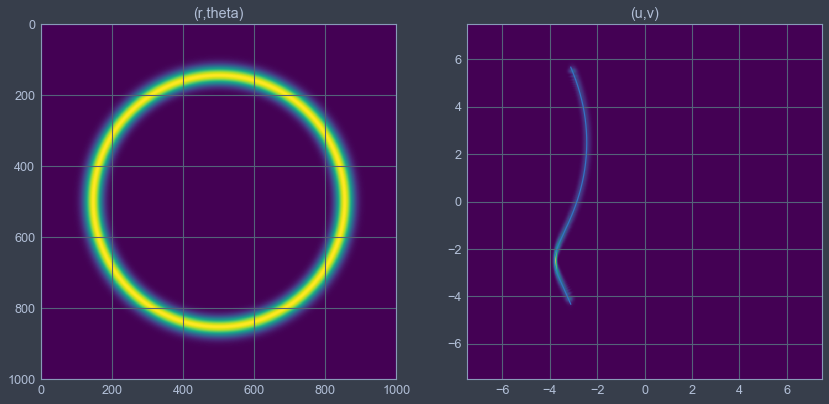

In [13]:
l=100
LG = dg.LG(X,Y,l,w_0=1)
phi1 = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
psi_u = LG*np.exp(1j*phi1)
psi_L1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psi_u)))

R = np.sqrt(X**2+Y**2); T = np.arctan2(Y,X)

r = 2*np.abs(500-np.argmax(LG[500]))/100; t = np.linspace(-np.pi,np.pi,1000)
U = -a*np.log(r/b)+l*f/k*np.sin(t)/r; V = a*t - l*f/k*np.cos(t)/r

dx = x[1]-x[0]
extent = lam*f*np.array([-1/(2*dx),1/(2*dx),-1/(2*dx),1/(2*dx)])

print(np.abs(500-np.argmax(LG[500])))
plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)"); plt.imshow(np.abs(LG)**2)
plt.subplot(1,2,2); plt.title("(u,v)"); plt.plot(U,V); plt.imshow(np.abs(psi_L1)**2,extent=extent,origin='lower')
plt.show()

## Conclusions

So, this little bit of algebra shows exactly what coordinate transformation is being implemented when we send a beam with azimuthal phase dependence through these sorter elements. What remains is to figure out whether there's anything we can do to rectify the adverse effects of this altered coordinate transformation, in addition to determining whether there's even enough demand for high-OAM sorting to justify putting time into it. However, one problem that probably is worth solving is the fact that for this method of sorting, even low-OAM ($l<5$) gets a decent amount of error, due to this effect. 